In [ ]:
# Importing necessary libraries for web scraping
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd
from datetime import datetime, timedelta

# Uncomment the following line if you want to calculate the end date, which is 5 days from now
#end_date = datetime.now() + timedelta(days=5)

# Instead of calculating the end date, let's set it to a specific date, the end of 2011
end_date = datetime(2022, 12, 31)

# Initializing an empty DataFrame to store the scraped data
df = pd.DataFrame()

# Setting the start date for the loop
current_date = datetime(2008, 1, 1)  # Let's start from the beginning of 2008

# Loop through the dates from the start date to the end date
while current_date <= end_date:
    # Formatting the date in the required format, but we can optimize this further
    date_string = current_date.strftime("%b%d.%Y").lower()

    # Creating the URL by concatenating the date_string to the base URL
    url = f"https://www.forexfactory.com/calendar?day={date_string}"

    # Initializing the Selenium web driver
    driver = None

    try:
        # Instead of using the ChromeDriverManager, we could have manually installed the ChromeDriver
        s = Service(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=s)
        driver.get(url)

        # Adding a sleep to wait for the page to load fully, this might not always be the best approach
        time.sleep(10)  # Waiting for 10 seconds

        # Getting the page source
        page_source = driver.page_source

        # We mistakenly called the html_data variable, which should be replaced with the actual column name
        html_data = page_source

        # Parsing the HTML page using BeautifulSoup
        soup = BeautifulSoup(html_data, 'html.parser')

        # Finding all <td> elements with the specified class for dates
        td_dates = soup.find_all('td', class_='calendar__cell calendar__date date')

        # Finding all <td> elements with the specified class for times
        td_times = soup.find_all('td', class_='calendar__cell calendar__time time')

        # Extracting the time from the <td> elements
        times = [td_element.get_text(strip=True) for td_element in td_times]

        # Repeating the date value to match the length of other lists, but this could be improved
        dates = [td_dates[0].span.get_text(strip=True)] * len(times)

        # Extracting the values from all occurrences
        for td_element in td_dates[1:]:
            span_element = td_element.find('span', class_='date')
            if span_element is not None:
                value = span_element.text.strip()
                dates.append(value)

        # Finding all <td> elements with the specified class for currency
        td_currency = soup.find_all('td', class_='calendar__cell calendar__currency currency')

        # Extracting the currency values
        currencies = [td.get_text(strip=True) for td in td_currency]

        # Finding all <td> elements with class starting with the specified string for impacts
        td_impacts = soup.find_all('td', class_=lambda value: value and value.startswith('calendar__cell calendar__impact impact calendar__impact'))

        # Extracting the impact values from the <span> element
        impacts = [td.span['title'] for td in td_impacts]

        # Finding all <td> elements with the specified class for event titles
        td_events = soup.find_all('td', class_='calendar__cell calendar__event event')

        # Extracting the event titles from the <span> elements
        event_titles = [td_event.span.text.strip() for td_event in td_events]

        # Finding all <tr> elements with the specified class for event details
        tr_details = soup.find_all('tr', class_='calendar__row calendar__expand')

        # Extracting the event detail ids
        details_ids = [tr_element.get('data-eventid') for tr_element in tr_details]

        # Finding all <td> elements with the specified class for actual values
        td_actuals = soup.find_all('td', class_='calendar__cell calendar__actual actual')

        # Extracting the values from the <td> elements for actuals
        actual = [td_actual.get_text(strip=True) for td_actual in td_actuals]

        # Finding all <td> elements with the specified class for forecast values
        td_forecasts = soup.find_all('td', class_='calendar__cell calendar__forecast forecast')

        # Extracting the forecast values from the <td> elements
        forecasts = [td_forecast.find('span', class_='calendar-forecast').get_text(strip=True) for td_forecast in td_forecasts]

        # Finding all <td> elements with the specified class for previous values
        td_previous_values = soup.find_all('td', class_='calendar__cell calendar__previous previous')

        # Extracting the previous values from the <td> elements
        previous = [td_previous.find('span', class_='calendar-previous').get_text(strip=True) for td_previous in td_previous_values]

        # Creating a dictionary to hold the scraped data
        data = {
            'Date': dates,
            'Time': times,
            'Currency': currencies,
            'Impact': impacts,
            'Event Title': event_titles,
            'Details id': details_ids,
            'Actual': actual,
            'Forecast': forecasts,
            'Previous': previous
        }

# Appending the data to the DataFrame
        df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
    except Exception as e:
 # Printing an error message if an exception occurs
        print(f"Oops! An error occurred: {e}")
    finally:
  # Making sure to quit the web driver regardless of success or error
        if driver is not None:
            driver.quit()

    # Incrementing the current_date by one day for the next iteration
    current_date += timedelta(days=1)

# Saving the DataFrame to a CSV file
df.to_csv('Forex Factory Calendar.csv', index=False)


In [1]:
import pandas as pd

file_path = 'Forex Factory Calendar.csv'

df = pd.read_csv(file_path)

In [2]:
df.head(11)

,Date,Time,Currency,Impact,Event Title,Details id,Actual,Forecast,Previous
0,Sunday 01/01/2023,All Day,AUD,Non-Economic,Bank Holiday,130315,NaN,NaN,NaN
1,Sunday 01/01/2023,All Day,NZD,Non-Economic,Bank Holiday,130672,NaN,NaN,NaN
2,Monday 02/01/2023,All Day,CAD,Non-Economic,Bank Holiday,130255,NaN,NaN,NaN
3,Monday 02/01/2023,All Day,CHF,Non-Economic,Bank Holiday,133739,NaN,NaN,NaN
4,Monday 02/01/2023,All Day,CNY,Non-Economic,Bank Holiday,133702,NaN,NaN,NaN
5,Monday 02/01/2023,9:15am,EUR,Low Impact Expected,Spanish Manufacturing PMI,129087,46.4,45.9,45.7
6,Monday 02/01/2023,9:45am,EUR,Low Impact Expected,Italian Manufacturing PMI,129075,48.5,48.5,48.4
7,Monday 02/01/2023,9:50am,EUR,Low Impact Expected,French Final Manufacturing PMI,129111,49.2,48.9,48.9
8,Monday 02/01/2023,9:55am,EUR,Low Impact Expected,German Final Manufacturing PMI,129135,47.1,47.4,47.4
9,Monday 02/01/2023,10:00am,EUR,Low Impact Expected,Final Manufacturing PMI,129123,47.8,47.8,47.8


In [6]:
# Split  Date
df[['Day', 'MonthDay']] = df['Date'].str.extract(r'(^[a-zA-Z]{3})([a-zA-Z]{3}\s\d{1,2})')

# Combine MonthDay with the year 2023 and convert to datetime
df['Date'] = pd.to_datetime(df['MonthDay'] + ', 2023', format='%b %d, %Y')

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%A %d/%m/%Y')

# Drop 'Day' and 'MonthDay' columns
df = df.drop(columns=['Day', 'MonthDay'])

ValueError: time data 'day 01, 2023' does not match format '%b %d, %Y' (match)

In [ ]:
df

In [4]:
# Use forward fill to replace null values in the Time column
df['Time'] = df['Time'].fillna(method='ffill')

df.head()


,Date,Time,Currency,Impact,Event Title,Details id,Actual,Forecast,Previous,Day,MonthDay
0,Sunday 01/01/2023,All Day,AUD,Non-Economic,Bank Holiday,130315,NaN,NaN,NaN,Sun,day 01
1,Sunday 01/01/2023,All Day,NZD,Non-Economic,Bank Holiday,130672,NaN,NaN,NaN,Sun,day 01
2,Monday 02/01/2023,All Day,CAD,Non-Economic,Bank Holiday,130255,NaN,NaN,NaN,Mon,day 02
3,Monday 02/01/2023,All Day,CHF,Non-Economic,Bank Holiday,133739,NaN,NaN,NaN,Mon,day 02
4,Monday 02/01/2023,All Day,CNY,Non-Economic,Bank Holiday,133702,NaN,NaN,NaN,Mon,day 02


In [ ]:
# Display the first few rows and the data types of the columns
df.dtypes

In [5]:
# Define a function to convert the time part of the 'Time' column to timedelta format
# This function handles different time formats and converts them to the appropriate timedelta representation.
def convert_time(time_string):
    if time_string == 'All Day':
        return pd.to_datetime('00:00:00').time()  # Convert 'All Day' to midnight (00:00:00)
    elif time_string == 'Day 1':
        return pd.to_datetime('00:00:01').time()  # Convert 'Day 1' to one second past midnight (00:00:01)
    else:
        try:
            return pd.to_datetime(time_string).time()  # Convert to datetime.time if possible
        except:
            return pd.NaT  # Return not-a-time for any other unparseable strings

# Store the original 'Date' and 'Time' columns to preserve the original data
# We'll use these columns later to restore the original data after sorting.
df['Original_Date'] = df['Date']
df['Original_Time'] = df['Time']

# Convert the 'Date' column to datetime format for sorting
# This helps in sorting the DataFrame chronologically based on dates.
df['Date_Sort'] = df['Date'].apply(convert_date)

# Use forward fill to replace null values in the 'Time' column
# Forward filling ensures that any missing time values are filled with the previous valid value.
df['Time'] = df['Time'].fillna(method='ffill')

# Convert the 'Time' column to datetime format for sorting, excluding 'All Day'
# The 'convert_time' function we defined earlier is used to handle different time formats.
df['Time_Sort'] = df['Time'].apply(convert_time)

# Sort the DataFrame by 'Date_Sort', 'Currency', and 'Time_Sort'
# Sorting based on date, currency, and time ensures a meaningful order of events in the DataFrame.
df = df.sort_values(by=['Date_Sort', 'Currency', 'Time_Sort'])

# Drop the 'Date_Sort' and 'Time_Sort' columns to avoid confusion
# We no longer need these columns as they were just used for sorting purposes.
df = df.drop(columns=['Date_Sort', 'Time_Sort'])

# Replace the 'Date' and 'Time' columns with the original 'Date' and 'Time' columns
# This step restores the original data, and the DataFrame is now sorted based on the original 'Date' and 'Time' values.
df['Date'] = df['Original_Date']
df['Time'] = df['Original_Time']

# Drop the 'Original_Date' and 'Original_Time' columns as we no longer need them
# These columns were used temporarily to store the original data during sorting.
df = df.drop(columns=['Original_Date', 'Original_Time'])

NameError: name 'convert_date' is not defined

In [ ]:
df.head(33)

In [ ]:
df.to_csv('Forex Factory Calendar.csv', index=False)

In [8]:
data = pd.read_csv('Forex Factory Calendar.csv')


data.head()

,Date,Time,Currency,Impact,Event Title,Details id,Actual,Forecast,Previous
0,Sunday 01/01/2023,All Day,AUD,Non-Economic,Bank Holiday,130315,NaN,NaN,NaN
1,Sunday 01/01/2023,All Day,NZD,Non-Economic,Bank Holiday,130672,NaN,NaN,NaN
2,Monday 02/01/2023,All Day,CAD,Non-Economic,Bank Holiday,130255,NaN,NaN,NaN
3,Monday 02/01/2023,All Day,CHF,Non-Economic,Bank Holiday,133739,NaN,NaN,NaN
4,Monday 02/01/2023,All Day,CNY,Non-Economic,Bank Holiday,133702,NaN,NaN,NaN


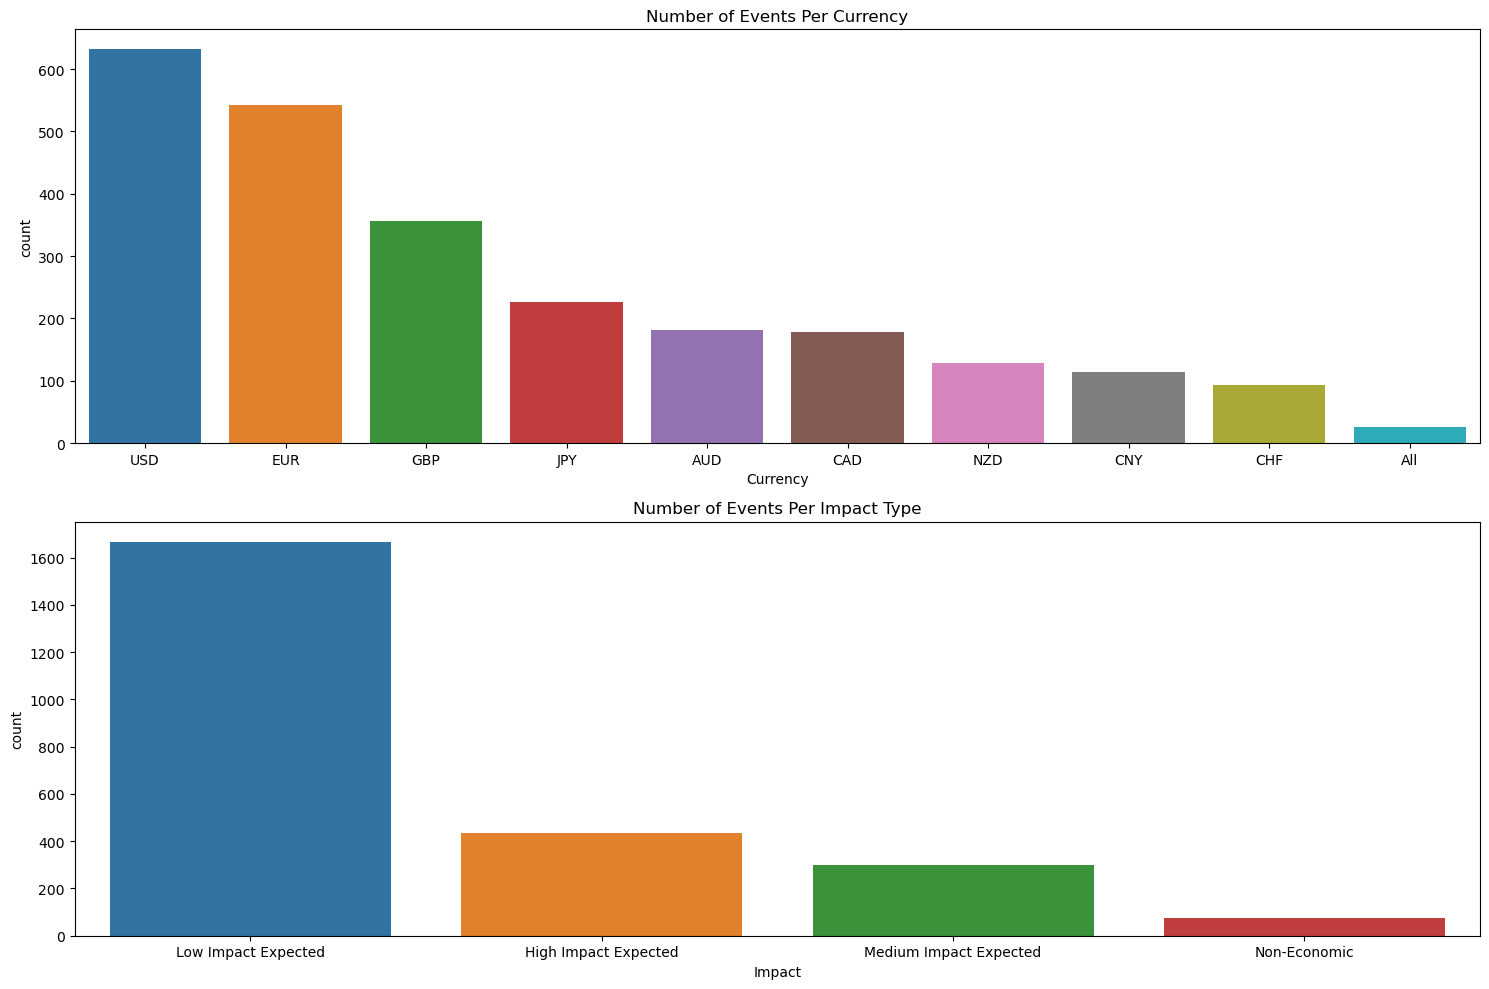

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with two subplots arranged vertically
# The figure size is set to 15 inches wide and 10 inches high.
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot the number of events per currency using a countplot
# The order of the bars is arranged based on the count of events for each currency, in descending order.
sns.countplot(x='Currency', data=data, order=data['Currency'].value_counts().index, ax=axes[0])
axes[0].set_title('Number of Events Per Currency')  # Adding a title to the first subplot

# Plot the number of events per impact type using another countplot
# The order of the bars is arranged based on the count of events for each impact type, in descending order.
sns.countplot(x='Impact', data=data, order=data['Impact'].value_counts().index, ax=axes[1])
axes[1].set_title('Number of Events Per Impact Type')  # Adding a title to the second subplot
# Adjust the layout of the subplots to prevent overlapping of axes labels and titles
plt.tight_layout()

# Display the plots
plt.show()

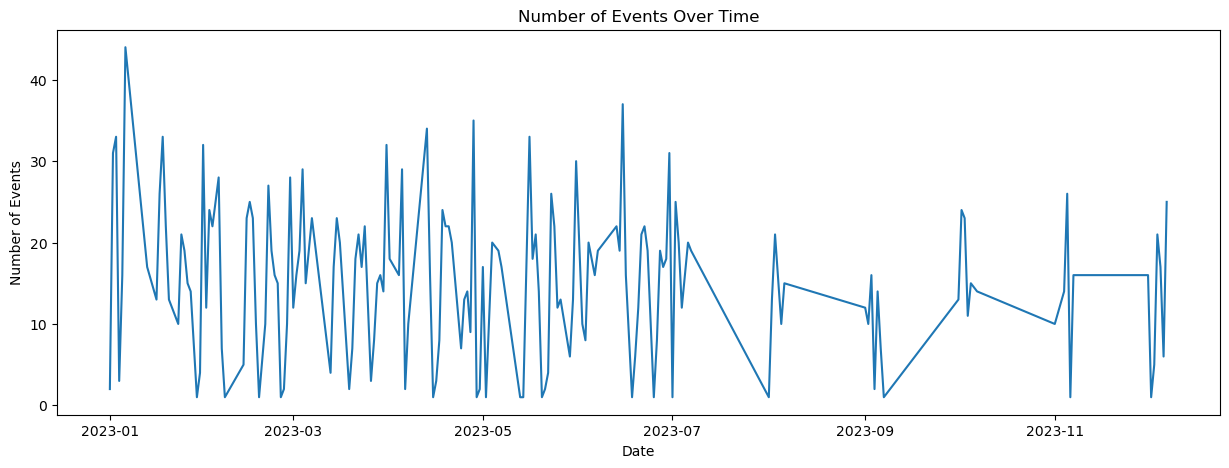

In [10]:
#convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#Count the number events in each day
daily_event_counts = data['Date'].value_counts().sort_index()

#Create the plot
plt.figure(figsize=(15, 5))
plt.plot(daily_event_counts)
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

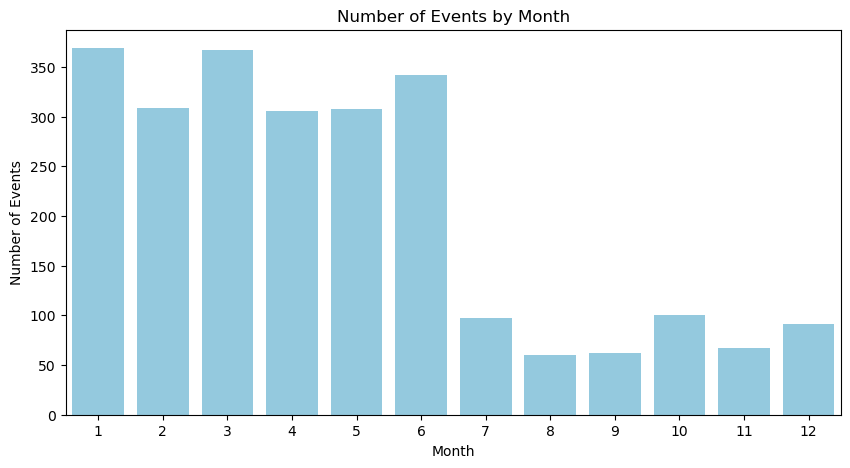

In [11]:
# number of Events by Month
data['Month'] = data['Date'].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=data, color='skyblue')
plt.title('Number of Events by Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.show()

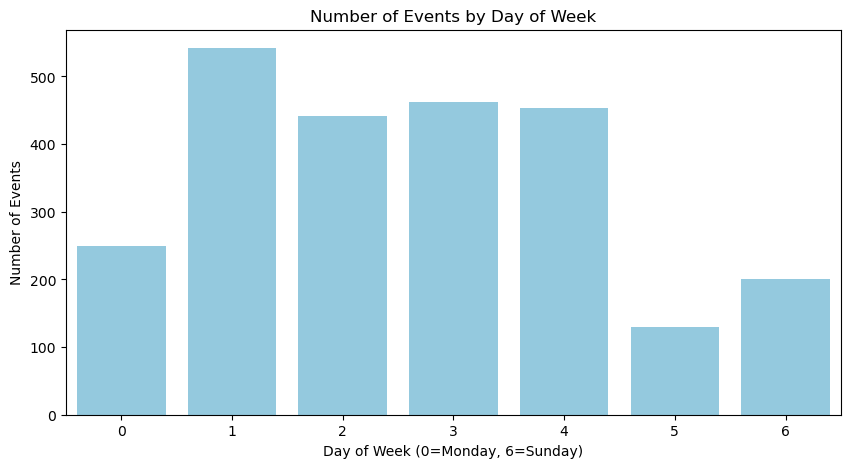

In [12]:
#number of Events by Day of Week
data['DayOfWeek'] = data['Date'].dt.dayofweek
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=data, color='skyblue')
plt.title('Number of Events by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Events')
plt.show()

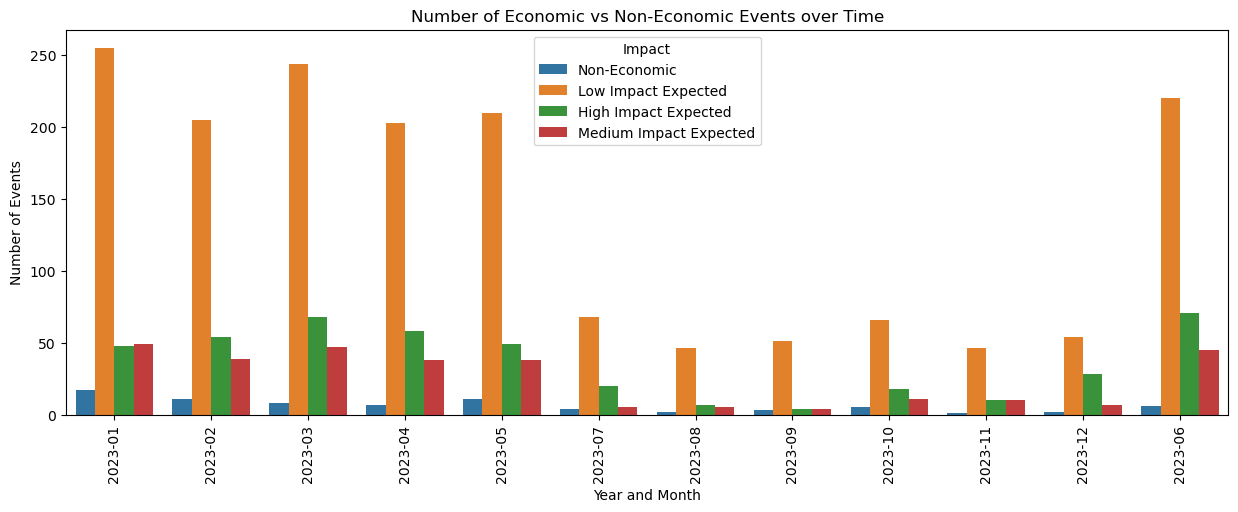

In [13]:
#number of Economic vs Non-Economic Events over Time
data['YearMonth'] = data['Date'].dt.to_period('M')
plt.figure(figsize=(15, 5))
sns.countplot(x='YearMonth', hue='Impact', data=data)
plt.title('Number of Economic vs Non-Economic Events over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.show()

C:\Users\My PC\AppData\Local\Temp\ipykernel_32088\455448670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['YearMonth'] = data_filtered['YearMonth'].dt.to_timestamp()


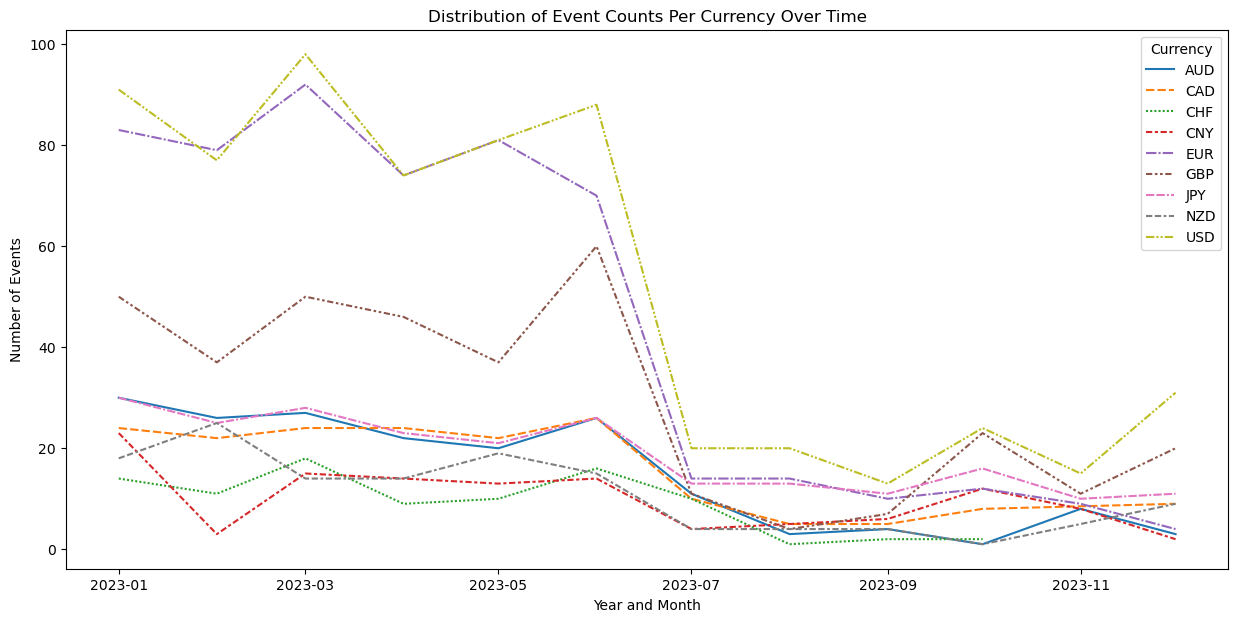

In [14]:
# Exclude 'All' category from the data
data_filtered = data[data['Currency'] != 'All']
# Convert 'YearMonth' to datetime
data_filtered['YearMonth'] = data_filtered['YearMonth'].dt.to_timestamp()

# Group by 'YearMonth' and 'Currency' and count the number of events
currency_counts_over_time = data_filtered.groupby(['YearMonth', 'Currency']).size().unstack()

# Plot the counts over time for each currency
plt.figure(figsize=(15, 7))
sns.lineplot(data=currency_counts_over_time)
plt.title('Distribution of Event Counts Per Currency Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Events')
plt.show()

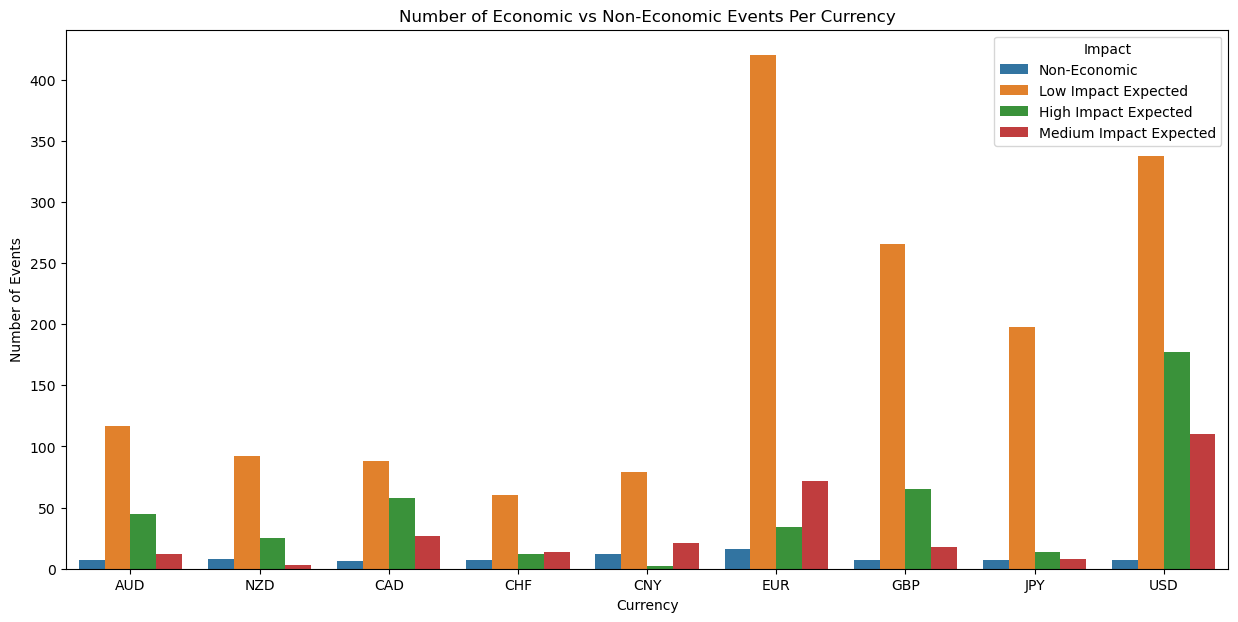

In [15]:
# Create a countplot with 'Currency' on the x-axis and 'Impact' as hue
plt.figure(figsize=(15, 7))
sns.countplot(x='Currency', hue='Impact', data=data_filtered)
plt.title('Number of Economic vs Non-Economic Events Per Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Events')
plt.show()

C:\Users\My PC\AppData\Local\Temp\ipykernel_32088\2230279409.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hour'] = data_filtered['Time'].apply(get_hour)
C:\Users\My PC\AppData\Local\Temp\ipykernel_32088\2230279409.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.dropna(subset=['Hour'], inplace=True)


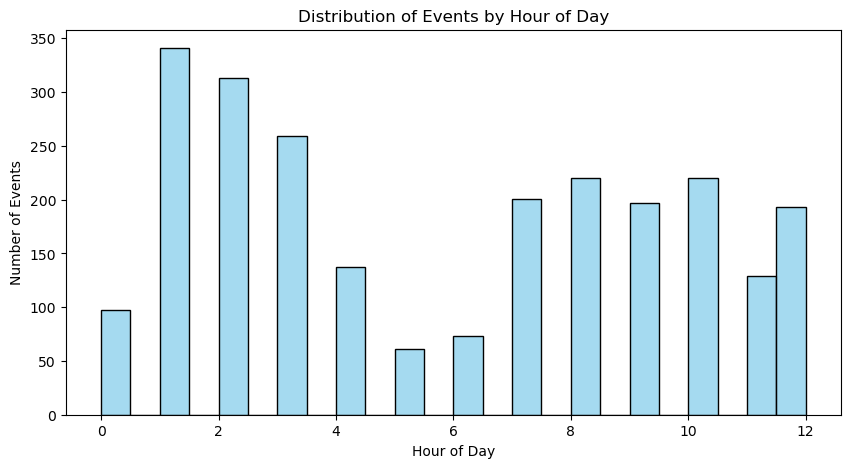

In [16]:
import numpy as np

# Function to extract hour from time
def get_hour(time_str):
    if time_str == 'All Day':
        return 0
    try:
        return int(time_str.split(':')[0])
    except ValueError:
        return np.nan

# Apply the function to the 'Time' column
data_filtered['Hour'] = data_filtered['Time'].apply(get_hour)

# Drop NaN values from 'Hour' column
data_filtered.dropna(subset=['Hour'], inplace=True)

# Create a histogram of event distribution by hour of day
plt.figure(figsize=(10, 5))
sns.histplot(data_filtered['Hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribution of Events by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()

C:\Users\My PC\AppData\Local\Temp\ipykernel_32088\2334783136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['DayOfMonth'] = data_filtered['Date'].dt.day


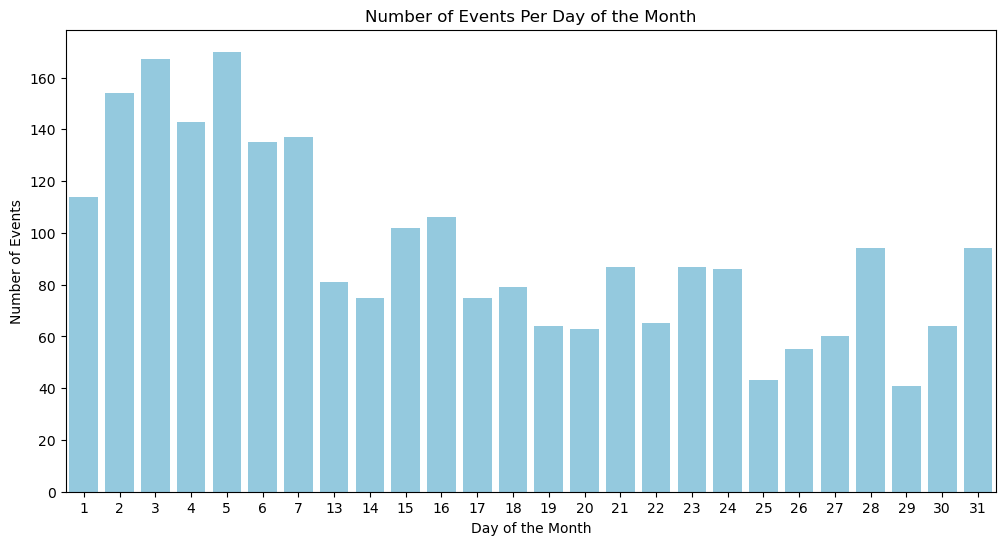

In [17]:
#create a new column for the day of the month
data_filtered['DayOfMonth'] = data_filtered['Date'].dt.day

#create a countplot of events by day of the month
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfMonth', data=data_filtered, color='skyblue')
plt.title('Number of Events Per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Events')
plt.show()

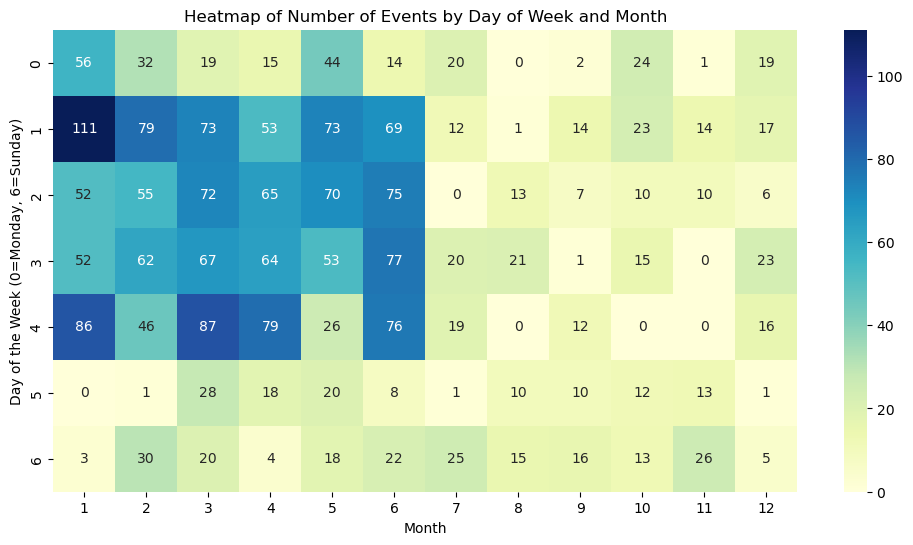

In [18]:
#create a pivot table with the count of events for each day of the week and month
pivot_table = data_filtered.pivot_table(index='DayOfWeek', columns='Month', aggfunc='size')

#fill NaN values in the pivot table with 0 and convert to integer
pivot_table_filled = pivot_table.fillna(0).astype(int)
#create a heatmap of the filled pivot table
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_filled, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Number of Events by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()


In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('Forex Factory Calendar.csv')

#Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%A %d/%m/%Y')
# Function to extract hour from time
def get_hour(time_str):
    if time_str == 'All Day':
        return 0
    try:
        return int(time_str.split(':')[0])
    except ValueError:
        return np.nan

#apply the function to the 'Time' column
df['Hour'] = df['Time'].apply(get_hour)


df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df['DayOfMonth'] = df['Date'].dt.day

 
df.to_csv('Forex Factory Calendar.csv', index=False)
